EDA

---
---
Basic Data Inspection
---


---
---

In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)

In [3]:
#loading the data that has been extracted
df =pd.read_csv("../../extracted_data/2008-2016-deliveries(detailed).csv")

In [4]:
#basic data inspection

from basic_data_inspection import DataInspectorStrategy, DatatypeInspector, summaryInspector, DataInspector

In [5]:
data_inspector= DataInspectorStrategy(DatatypeInspector())
result=data_inspector.execute_inspection(df)
result

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 n

In [6]:
data_inspector.set_strategy(summaryInspector())
result=data_inspector.execute_inspection(df)
result

Summary Statistics: for numerical columns
            match_id         inning           over           ball  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean      318.281317       1.482188      10.142649       3.616483   
std       182.955531       0.501768       5.674338       1.807698   
min         1.000000       1.000000       1.000000       1.000000   
25%       161.000000       1.000000       5.000000       2.000000   
50%       319.000000       1.000000      10.000000       4.000000   
75%       476.000000       2.000000      15.000000       5.000000   
max       636.000000       4.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  150460.000000  150460.000000  150460.000000  150460.000000   
mean        0.000538       0.037498       0.004885       0.022232   
std         0.023196       0.257398       0.114234       0.200104   
min         0.000000       0.000000       0.000000       0.0

Here’s a **structured analysis** of your dataset summary based on the provided statistics:

---

## **1. Dataset Overview**

* **Total Rows:** 150,460
* **Type of Data:** Ball-by-ball cricket match data (likely IPL or similar T20 league)
* **Column Types:**

  * **Numerical Columns:** 13
  * **Categorical Columns:** 9

---

## **2. Numerical Columns Analysis**

### **2.1 Match & Innings Details**

| Column        | Insights                                                                                                                     |
| ------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **match\_id** | IDs range from 1 to 636 — dataset covers \~636 matches.                                                                      |
| **inning**    | Mean ≈ 1.48 → majority of data is from 1st innings, but 2nd innings also significant. Max = 4 → Super Over matches included. |
| **over**      | Ranges 1–20 → matches are T20 format. Median = 10 overs.                                                                     |
| **ball**      | Ranges 1–9 → indicates balls per over, with extras inflating count above 6.                                                  |

---

### **2.2 Extra Runs Breakdown**

| Column              | Insights                                                                  |
| ------------------- | ------------------------------------------------------------------------- |
| **is\_super\_over** | Rare (0.05% of balls).                                                    |
| **wide\_runs**      | Mean = 0.037 → wides are uncommon; max = 5 wides in a ball.               |
| **bye\_runs**       | Mean ≈ 0.0049 → very rare.                                                |
| **legbye\_runs**    | Mean ≈ 0.022 → rare.                                                      |
| **noball\_runs**    | Mean ≈ 0.0043 → rare; max = 5 runs from a no-ball (including overthrows). |
| **penalty\_runs**   | Extremely rare (mean = 0.000066).                                         |

---

### **2.3 Scoring Stats**

| Column            | Insights                                                                              |
| ----------------- | ------------------------------------------------------------------------------------- |
| **batsman\_runs** | Mean ≈ 1.22 runs per ball; max = 6 (sixes).                                           |
| **extra\_runs**   | Mean ≈ 0.069 → extras form small part of scoring.                                     |
| **total\_runs**   | Mean ≈ 1.29 → consistent with T20 scoring rates. Max = 7 runs possible (6 + 1 extra). |

---

## **3. Categorical Columns Analysis**

### **3.1 Teams**

| Column            | Insights                                                                    |
| ----------------- | --------------------------------------------------------------------------- |
| **batting\_team** | 14 unique teams; most frequent: **Mumbai Indians** (12.6% of data).         |
| **bowling\_team** | 14 unique teams; most frequent: **Mumbai Indians** as bowling side (12.5%). |

---

### **3.2 Players**

| Column           | Insights                                                               |
| ---------------- | ---------------------------------------------------------------------- |
| **batsman**      | 461 unique; most frequent: **V Kohli** (3,494 balls faced).            |
| **non\_striker** | 458 unique; most frequent: **G Gambhir** (3,635 balls at non-striker). |
| **bowler**       | 356 unique; most frequent: **Harbhajan Singh** (2,989 balls bowled).   |

---

### **3.3 Dismissals**

| Column                | Insights                                                                  |
| --------------------- | ------------------------------------------------------------------------- |
| **player\_dismissed** | 7,438 dismissals; most dismissed player: **SK Raina** (134 times).        |
| **dismissal\_kind**   | 9 types; most common: **caught** (4,373 cases).                           |
| **fielder**           | 451 unique fielders; most frequent catcher: **KD Karthik** (127 catches). |

---

## **4. Key Observations**

1. **Format:** Data is from a **T20 cricket league** (overs capped at 20, super overs possible).
2. **Mumbai Indians Dominance:** Appear most frequently both batting & bowling.
3. **Star Performers:**

   * **Batsman with most balls faced:** V Kohli
   * **Bowler with most deliveries:** Harbhajan Singh
   * **Most dismissals:** SK Raina
   * **Top catcher:** KD Karthik
4. **Dismissal Trend:** Majority are **caught**.
5. **Extras Impact:** Minimal — extras contribute little to total scoring.
6. **Run Rate:** Average ≈ 1.29 runs per ball → \~7.74 runs per over.


---
---
## Changes to make in Dataset


## **1. Transform into Ranges / Bins**

Some numeric features are better used in **bucketed form** to reduce noise:

* **over** → Convert to phases:

  * Powerplay (1–6)
  * Middle overs (7–15)
  * Death overs (16–20)

  **ball** → Convert to phases:

  * Early
  * Late
  Example outputs:
    Powerplay_Early
    Middle_Late
    Death_Early

* **total\_runs** (or batsman\_runs) →we can do both predicting range category and exact runs, so that model can learn two related tasks at once.
* **player\_dismissed** → the previous ball’s dismissal can absolutely influence the next ball’s runs. so we can do: Convert it into a binary flag like wicket_previous_ball = 1/0.

---

## **2. Rare or Very Low-Impact Features — Drop**

These occur too rarely and add little predictive value, but add noise:

* **is\_super\_over** → Extremely rare (0.05% balls) → can drop unless specifically predicting super overs.
* **bye\_runs** → Very rare.
* **legbye\_runs** → Rare.
* **penalty\_runs** → Extremely rare.
* **extra_run** → can remove extra_runs because its components (wide_runs, noball_runs, bye_runs, legbye_runs) are already present, and cases where extras are more than 1 are rare, so its effect on prediction will be minimal.

---

## **4. Potential Outliers to Watch**

* **wide\_runs** → Can be up to 5, rare but can skew data.
* **noball\_runs** → Up to 5, also rare.
* **total\_runs** → Max = 7 (six + extras) → rare cases may skew run distribution.

so keeping in mind that removing the rows will discountinue the data so, we will do clipping (capping) and for extreme rare we will make new feature name "is_outlier"

Clipping → Keeps extreme values from distorting the model’s scaling and learning.
is_outlier flag → Tells the model, “Hey, this was originally an unusual ball,” so it can adjust predictions for the next deliveries.

---

## **5. Encoding Strategy for DL Model**

Since RNN/LSTM works best with sequences:

* **Categorical Encoding**: Use integer encoding or embeddings for `batting_team`, `bowling_team`, `batsman`, `bowler`, `non_striker`.
* **Numerical Features**: Normalize (0–1) or standardize for over, ball, runs.
* **Sequence Window**: Feed the last *N* balls as input to predict the next ball.


---
---
Missing value Handling
--

---
---

In [7]:
from missing_value import SimpleMissingValueAnalysis

Identifying missing values...
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64


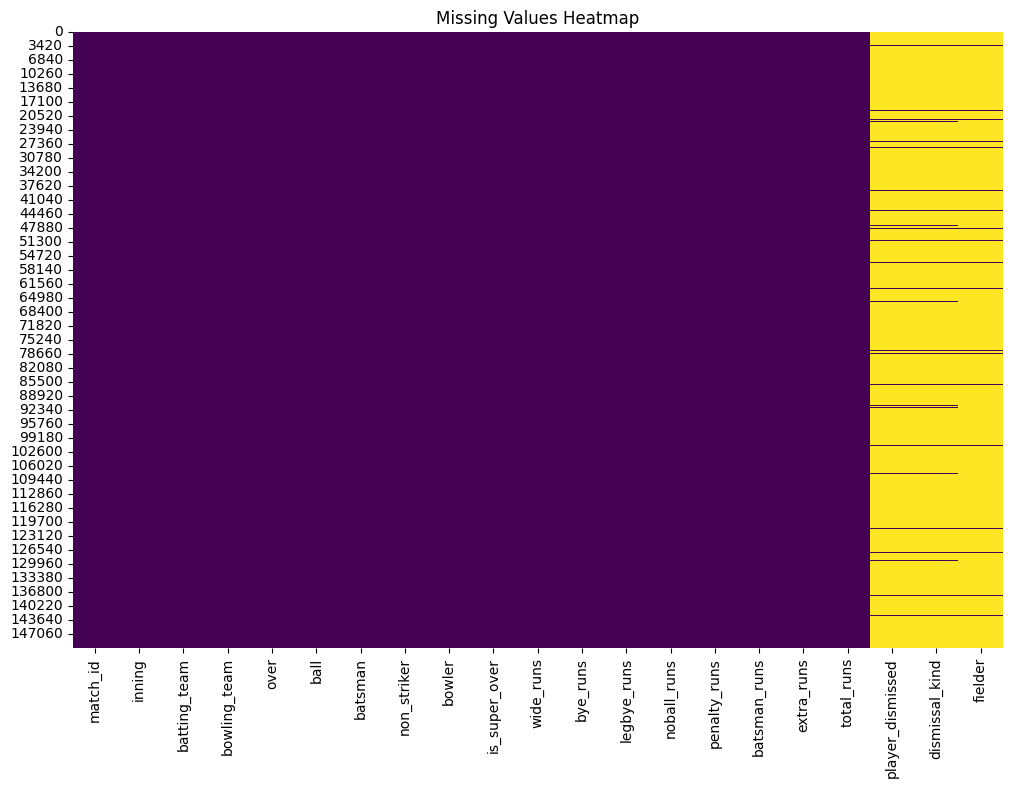

In [10]:
miss_value= SimpleMissingValueAnalysis()
result=miss_value.analyze(df)
result

### **Missing Columns**

So here the Data missing is Random, i.e. Randomly Distributed. There is no Structured missing pattern

* **`player_dismissed` (143,022 missing)**

  * Makes sense: Only present when a wicket falls.
  * Missing rows mean **no dismissal happened** for that ball.
  * We can fill these with `"Not Out"` or `0` (if encoded) instead of dropping rows, because they’re part of the match sequence.

* **`dismissal_kind` (143,022 missing)**

  * Same as above — only filled when a wicket happens (e.g., "caught", "bowled").
  * Can fill missing with `"None"` or `0`.

* **`fielder` (145,091 missing)**

  * Only relevant for certain dismissal kinds (caught, run out, stumped).
  * Missing when dismissal type doesn't involve a fielder.
  * Can fill with `"None"` or `0`.

---
---
Univariate, Bivariate and Multivariate Analysis
---

---
---

In [13]:
from univariate import UnivariateAnalysisMain, numericalAnalysis, categoricalAnalysis

Analyzing categorical variables...


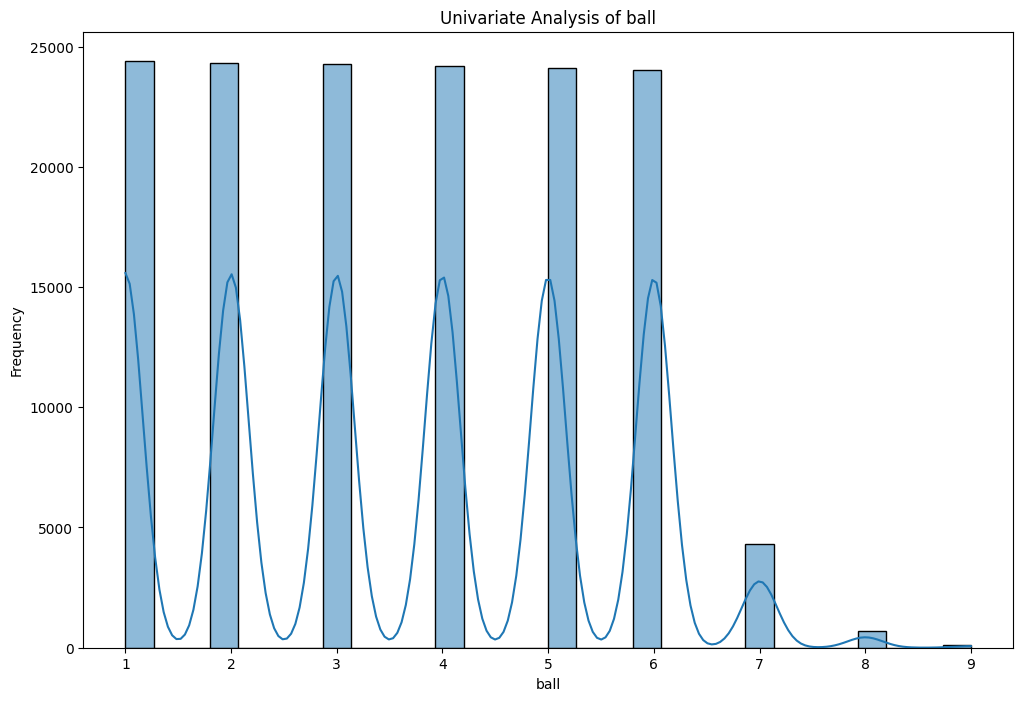

In [17]:
uni_analysis= UnivariateAnalysisMain(numericalAnalysis())
uni_analysis.execute_analysis(df,feature='ball')

---
So we can see that ball 7,8,9 are rare balls in a over. so we will make a new feature name "ball_clipped" were ball 7,8,9 will be clipped to 6 and another new feature "extra_ball", which will tell number of extra ball

example:
 
 a small **example dataset** showing **both approaches** for the `ball` column when some overs have more than 6 deliveries because of extras (no-balls, wides, etc.).

---

### **Sample Data**

| over | ball | batsman\_runs | extra\_runs | total\_runs | option1\_ball\_clipped | extra\_balls\_in\_over |
| ---- | ---- | ------------- | ----------- | ----------- | ---------------------- | ---------------------- |
| 1    | 1    | 0             | 0           | 0           | 1                      | 0                      |
| 1    | 2    | 1             | 0           | 1           | 2                      | 0                      |
| 1    | 6    | 4             | 0           | 4           | 6                      | 0                      |
| 1    | 7    | 0             | 1           | 1           | **6**                  | 1                      |
| 1    | 8    | 1             | 0           | 1           | **6**                  | 2                      |
| 2    | 1    | 6             | 0           | 6           | 1                      | 0                      |

---


* **Option 1 (Clipping)**
  If `ball > 6`, set it to `6`.

  * Keeps the sequence neat for RNN/LSTM
  * The fact that there were extra balls is captured separately in `extra_runs`.

* **Option 2 (New Feature)**
  Keep original ball number but add `extra_balls_in_over` = `ball - 6 if ball > 6 else 0`.

  * Lets model know that the over was extended.
  * Preserves real-world sequence but can slightly complicate the time-step logic.
---


Analyzing categorical variables...


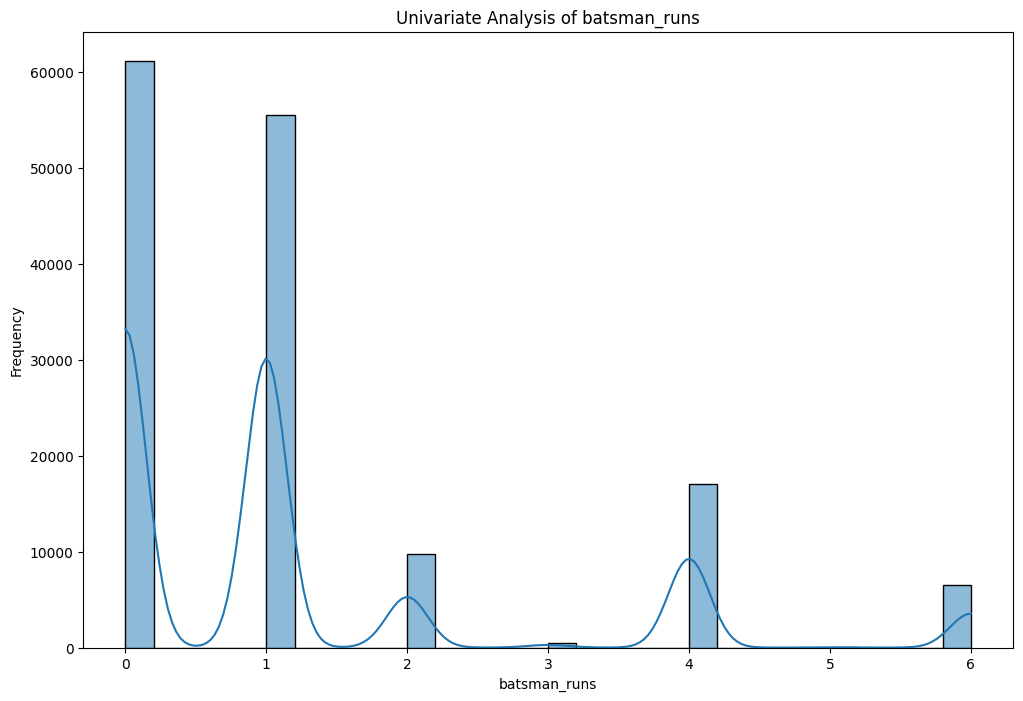

Analyzing categorical variables...


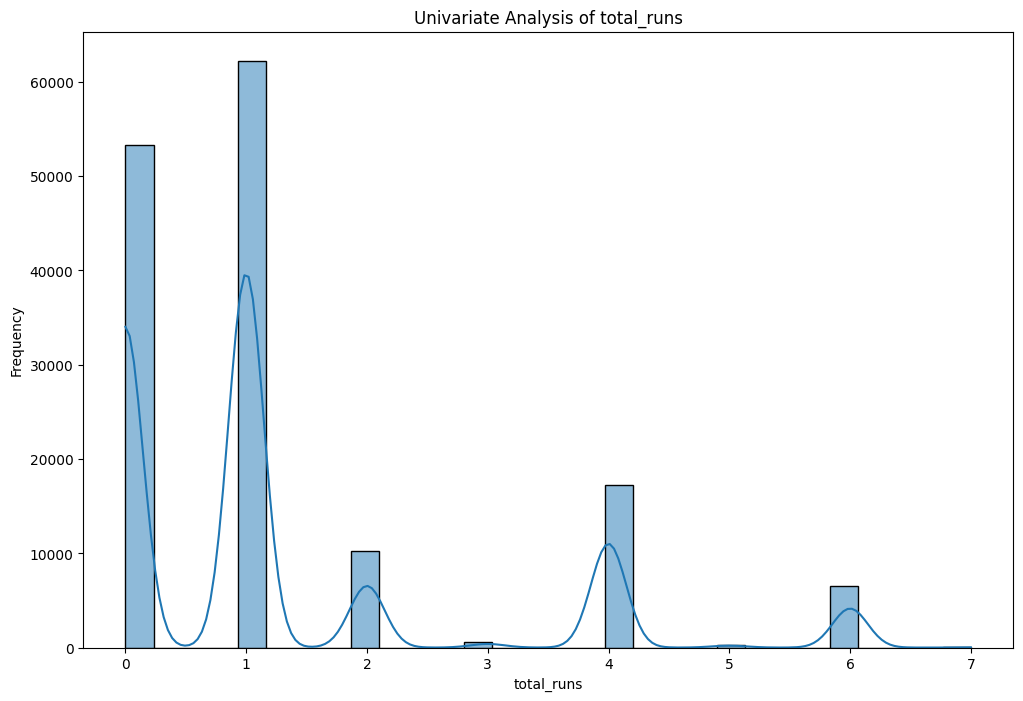

In [22]:
uni_analysis.execute_analysis(df,feature='batsman_runs')
uni_analysis.execute_analysis(df,feature='total_runs')

---
AS we can see that run 3,5,7 are very rare runs, so we will add them in group as "rare_runs" , Also if we remove this rows then it will discontinue the sequence.

example:

| ball | batsman\_runs | batsman\_runs\_grouped |
| ---- | ------------- | ---------------------- |
| 1    | 0             | 0                      |
| 2    | 1             | 1                      |
| 3    | 2             | 2                      |
| 4    | 3             | rare\_runs             |
| 5    | 4             | 4                      |
| 6    | 6             | 6                      |
| 7    | 5             | rare\_runs             |
| 8    | 1             | 1                      |
| 9    | 2             | 2                      |
| 10   | 0             | 0                      |
---

Analyzing categorical variables...


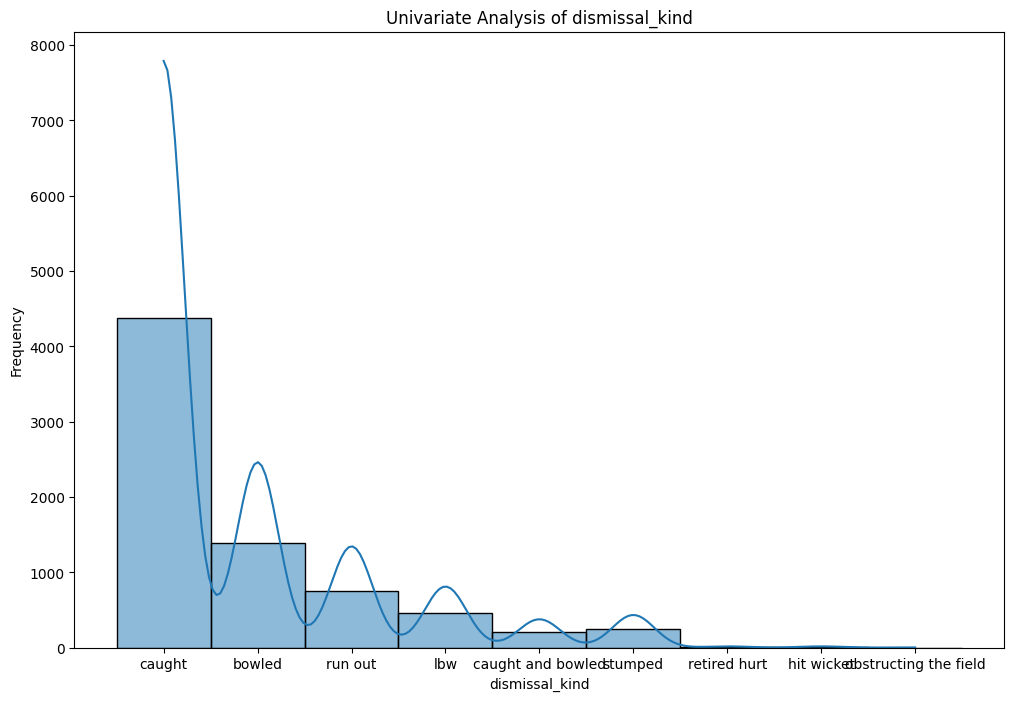

In [23]:
uni_analysis.execute_analysis(df,feature='dismissal_kind')

---
"Caught and Bowled", "retired hurt", "hit wicket" and "obstructing the field" are the dimmissal_kind categories and are very rare, so we will make another feature with others as rare category in dataset

---

**Reason:**

* These categories are still valid dismissal types but **too rare** to model separately.
* If you keep them as-is, your model might overfit or struggle because it won’t have enough data for each rare category.
* Grouping keeps the dataset cleaner and the model simpler.
---
| player\_id | dismissal\_kind | dismissal\_kind\_grouped |
| ---------- | --------------- | ------------------------ |
| 1          | caught          | caught                   |
| 2          | bowled          | bowled                   |
| 3          | run out         | run out                  |
| 4          | lbw             | lbw                      |
| 5          | caught          | caught                   |
| 6          | stumped         | Other                    |
| 7          | hit wicket      | Other                    |
| 8          | caught          | caught                   |
| 9          | retired hurt    | Other                    |
| 10         | bowled          | bowled                   |

---

Analyzing categorical variables...


d:\Code\machine Learning & projects\ATP_tennis_model\analysis\analysis_src\univariate.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='muted')


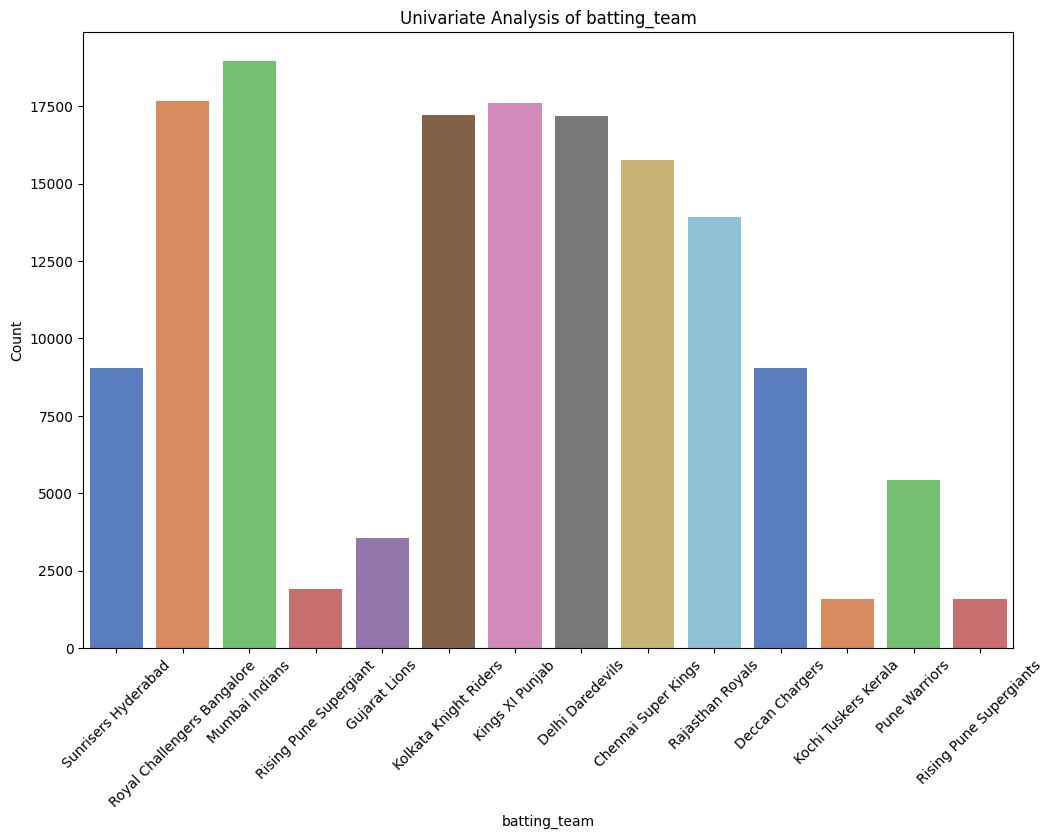

Analyzing categorical variables...


d:\Code\machine Learning & projects\ATP_tennis_model\analysis\analysis_src\univariate.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='muted')


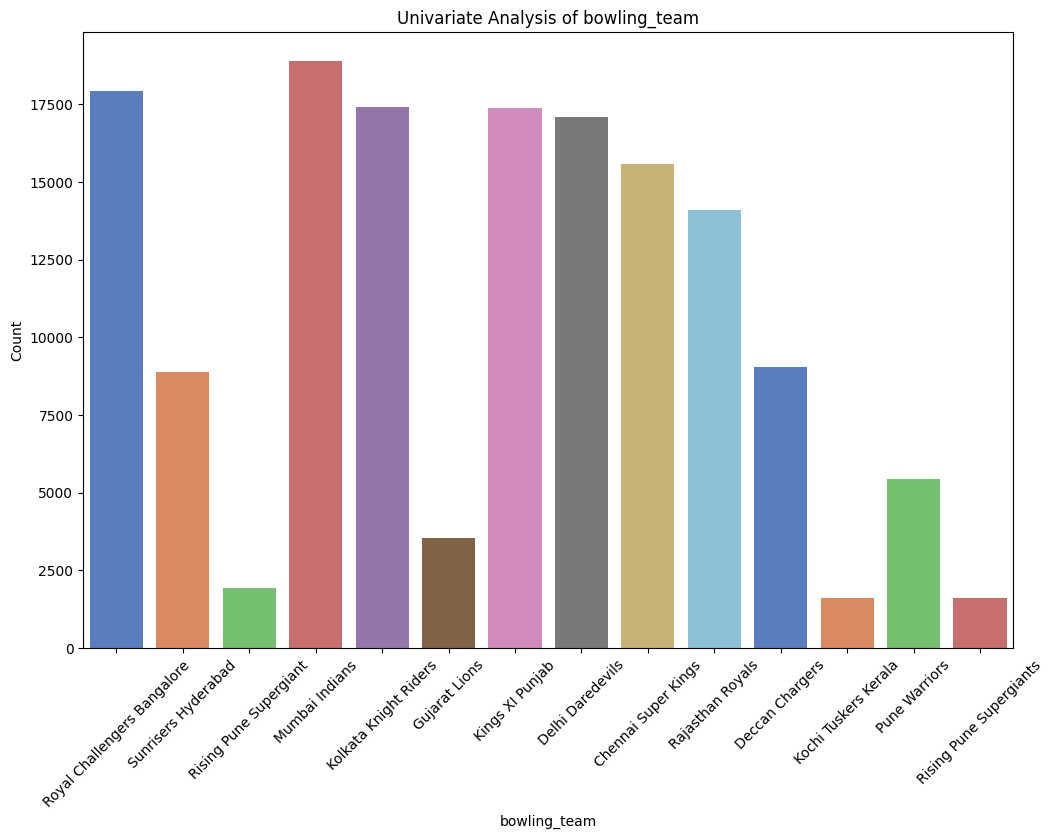

In [25]:
uni_analysis.set_strategy(categoricalAnalysis())
uni_analysis.execute_analysis(df,feature='batting_team')
uni_analysis.execute_analysis(df,feature='bowling_team')